<h1 align='center' style="color: blue;">HW2- 2023</h1>

Image classification is a supervised learning problem: define a set of target classes (objects to identify in images), and train a model to recognize them using labeled example photos. Early computer vision models relied on raw pixel data as the input to the model.


You need to work on a popular Fashion MNIST dataset for this HW. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. 

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [ ]:
# !pip install --upgrade tensorflow

You can also check the version of it using the following code.

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

Now, it's time to load the dataset

In [ ]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [ ]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

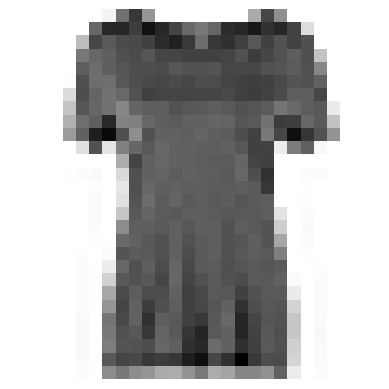

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [ ]:
y_train[10]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accuracy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of ten fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

## TASK 1

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

global_accuracy={}

In [ ]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

# scikit-learn expects 2d num arrays for the training dataset for a fit function. (nsamples,nx*ny)

### 1) Logistic Regression

Logistic Regression is a type of analysis that is used if the goal is to determine the category/class of the output. For example, if the email is a spam or not. In this case logistic regression is used to determine the letter symbolized in the hand image.

In [ ]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr.fit(X_train, y_train)

y_pred = logr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
global_accuracy['Logistic Regression']=acc

print("ACCURACY OF LOGISTIC REGRESSION MODEL:", acc)
print("\nCLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))

ACCURACY OF LOGISTIC REGRESSION MODEL: 0.8412

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.86      0.85      1000
           4       0.71      0.78      0.74      1000
           5       0.94      0.89      0.92      1000
           6       0.64      0.55      0.59      1000
           7       0.90      0.93      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


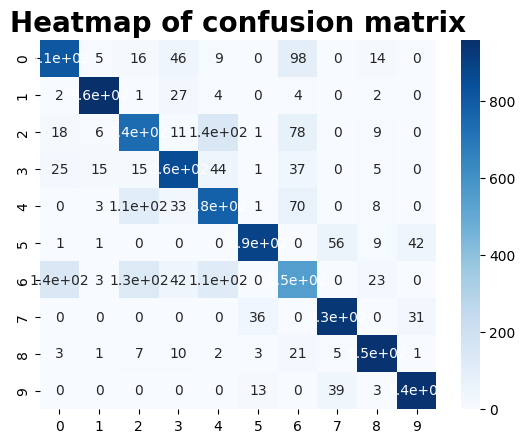

In [ ]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Heatmap of confusion matrix', size=20, fontweight="bold")
plt.show()

### 2) Decision Tree

In image classification, the decision trees are mostly reliable and easy to interpret, as their structure consists of a tree with leaves which represent class labels, and branches that use logical conjunction to produce a value based on an ”if-then” rule.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
acc = accuracy_score(y_test, y_pred)
global_accuracy['Decision Tree']=acc

print("ACCURACY OF DECISION TREE MODEL:", acc)
print("\nCLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))

ACCURACY OF DECISION TREE MODEL: 0.7902

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.96      0.94      0.95      1000
           2       0.63      0.66      0.64      1000
           3       0.81      0.78      0.80      1000
           4       0.66      0.64      0.65      1000
           5       0.91      0.88      0.90      1000
           6       0.53      0.55      0.54      1000
           7       0.88      0.89      0.88      1000
           8       0.91      0.91      0.91      1000
           9       0.90      0.91      0.90      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



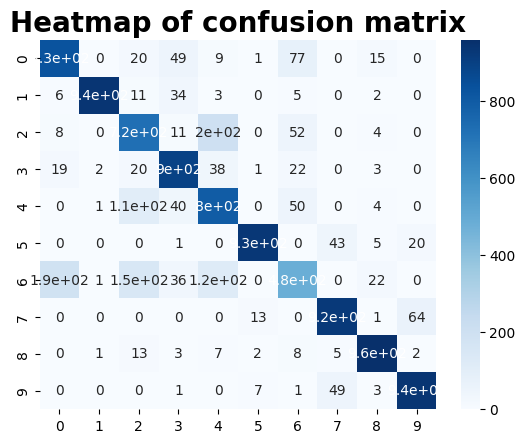

In [ ]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Heatmap of confusion matrix', size=20, fontweight="bold")
plt.show()

Average area under curve is: 0.8834444444444445


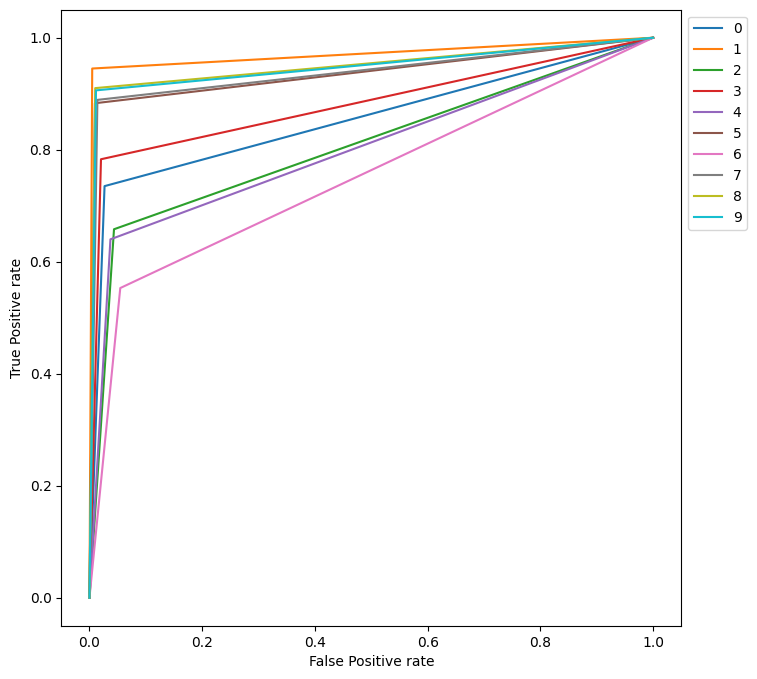

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
import statistics

plt.figure(figsize=(8,8))

y_bin=label_binarize(y_test,classes=np.unique(y_test))
false_pos_r={}
true_pos_r={}
th={}
auc_val={}
pred_prob=tree.predict_proba(X_test)
unique_cl=np.unique(y_test)
for i in range(len(unique_cl)):
    false_pos_r[i],true_pos_r[i],th[i]=roc_curve(y_bin[:,i],pred_prob[:,i])
    auc_val[i]=auc(false_pos_r[i],true_pos_r[i])
    plt.plot(false_pos_r[i],true_pos_r[i])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

print('Average area under curve is: ', end='')
avg_auc=statistics.mean(list(auc_val.values()))
print(avg_auc)

plt.legend([i for i in unique_cl], bbox_to_anchor=(1, 1))
plt.show()

### 3) Ranfom Forest

The Random Forest (RF) algorithm (Breimann 2001) belongs to the realm of supervised classification algorithms. RFs builds upon the concept of decision tree learning presented in the last session. The RF relies on many self-learning decision trees which in their sum make up a “Forest”.


In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC

forest=RFC(n_estimators=20,max_depth=10)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
acc = accuracy_score(y_test, y_pred)
global_accuracy['Random Forest']=acc

print("ACCURACY OF RANDOM FOREST MODEL:", acc)
print("\nCLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))

ACCURACY OF RANDOM FOREST MODEL: 0.8417

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      1000
           1       0.99      0.94      0.97      1000
           2       0.69      0.72      0.71      1000
           3       0.84      0.90      0.86      1000
           4       0.68      0.80      0.73      1000
           5       0.97      0.93      0.95      1000
           6       0.69      0.48      0.57      1000
           7       0.90      0.92      0.91      1000
           8       0.94      0.96      0.95      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



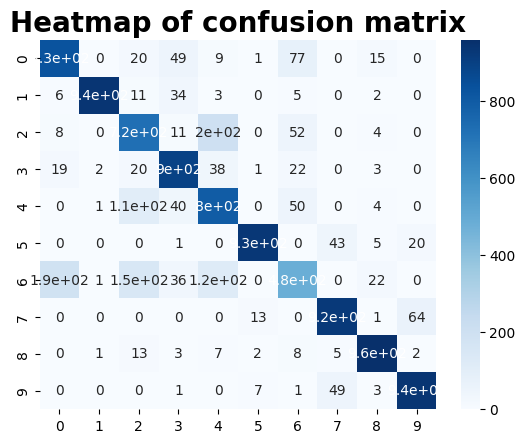

In [ ]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Heatmap of confusion matrix', size=20, fontweight="bold")
plt.show()

Average area under curve is: 0.9843240833333333


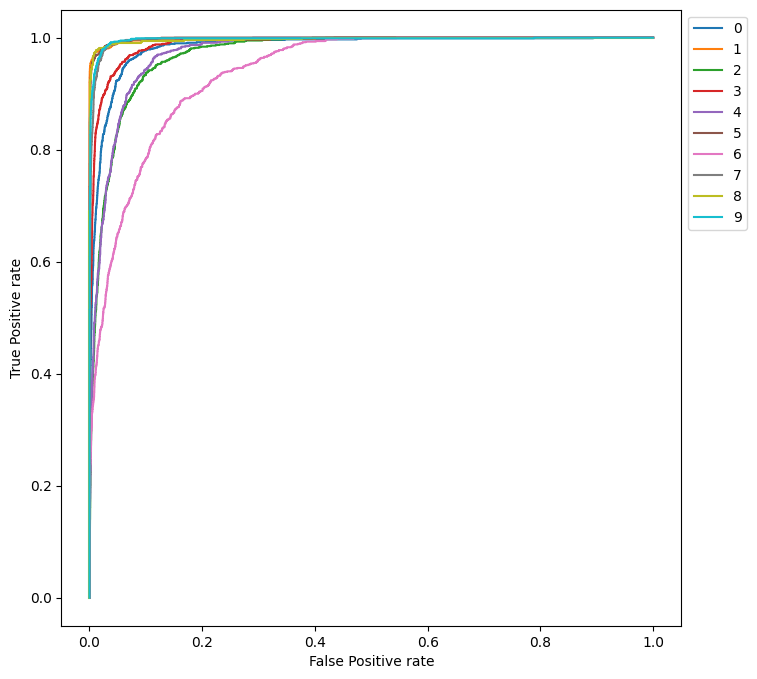

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
import statistics

plt.figure(figsize=(8,8))

y_bin=label_binarize(y_test,classes=np.unique(y_test))
false_pos_r={}
true_pos_r={}
th={}
auc_val={}
pred_prob=forest.predict_proba(X_test)
unique_cl=np.unique(y_test)
for i in range(len(unique_cl)):
    false_pos_r[i],true_pos_r[i],th[i]=roc_curve(y_bin[:,i],pred_prob[:,i])
    auc_val[i]=auc(false_pos_r[i],true_pos_r[i])
    plt.plot(false_pos_r[i],true_pos_r[i])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")

print('Average area under curve is: ', end='')
avg_auc=statistics.mean(list(auc_val.values()))
print(avg_auc)

plt.legend([i for i in unique_cl], bbox_to_anchor=(1, 1))
plt.show()

### 4) Naive Bayes

Naïve Bayes Classifier is one of the simple and most effective supervised Classification algorithms which helps in building the fast machine learning models that can make quick predictions. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
global_accuracy['Naive Bayes']=acc

print("ACCURACY OF NAIVE BAYES MODEL:", acc)
print("\nCLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))

ACCURACY OF NAIVE BAYES MODEL: 0.5856

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



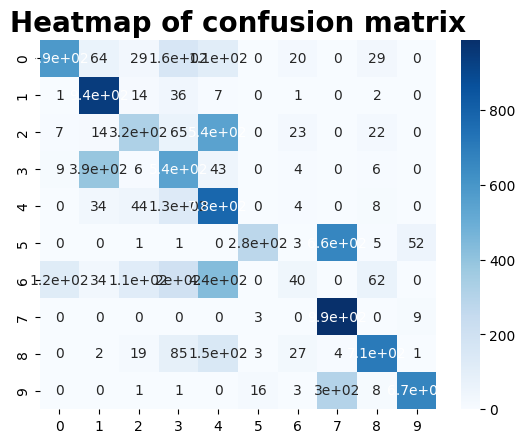

In [ ]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Heatmap of confusion matrix', size=20, fontweight="bold")
plt.show()

### 5) KNN

Simply put, the k-NN algorithm classifies unknown data points by finding the most common class among the k closest examples.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
global_accuracy['K-Nearest Neighbors']=acc

print("ACCURACY OF KNN CLASSIFIER:", acc)
print("\nCLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))

ACCURACY OF KNN CLASSIFIER: 0.8541

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80      1000
           1       0.98      0.97      0.98      1000
           2       0.72      0.81      0.76      1000
           3       0.91      0.85      0.88      1000
           4       0.80      0.74      0.77      1000
           5       0.99      0.83      0.91      1000
           6       0.65      0.59      0.62      1000
           7       0.89      0.95      0.92      1000
           8       0.98      0.95      0.97      1000
           9       0.89      0.97      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



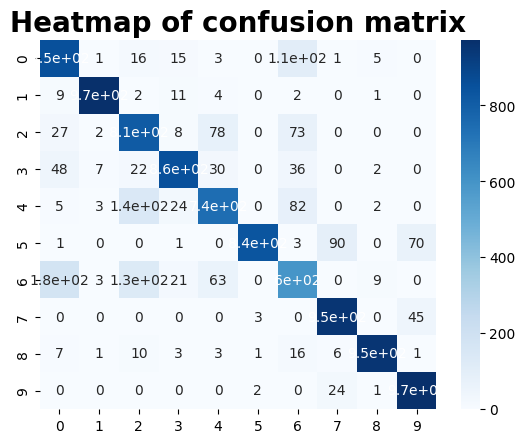

In [ ]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Heatmap of confusion matrix', size=20, fontweight="bold")
plt.show()

### 6) MLP Classifier

MLPs (Multilayer Perceptron) use one perceptron for each input (e.g. pixel in an image) and the amount of weights rapidly becomes unmanageable for large images. It includes too many parameters because it is fully connected. A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. MLP uses backpropogation for training the network.


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
global_accuracy['Multilayer Perceptron Classifier']=acc

print("ACCURACY OF MLP CLASSIFIER:", acc)
print("\nCLASSIFICATION REPORT:\n", classification_report(y_test, y_pred))

ACCURACY OF MLP CLASSIFIER: 0.8482

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.65      0.84      0.73      1000
           3       0.88      0.81      0.84      1000
           4       0.79      0.70      0.74      1000
           5       0.96      0.95      0.96      1000
           6       0.70      0.53      0.60      1000
           7       0.92      0.95      0.94      1000
           8       0.96      0.95      0.95      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



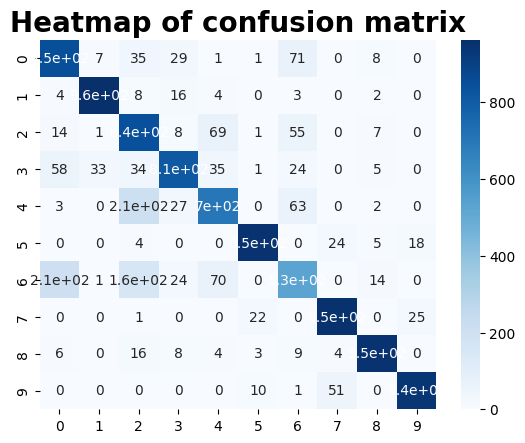

In [ ]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Heatmap of confusion matrix', size=20, fontweight="bold")
plt.show()

### Best Model

In [ ]:
print("{:<45} {:<60}".format('MODEL','ACCURACY'))
for k, v in global_accuracy.items():
    print("{:<45} {:<60.5f}".format(k, v))

MODEL                                         ACCURACY                                                    
Logistic Regression                           0.84120                                                     
Decision Tree                                 0.79100                                                     
Naive Bayes                                   0.58560                                                     
K-Nearest Neighbors                           0.85410                                                     
Multilayer Perceptron Classifier              0.84820                                                     


## TASK 2

In [ ]:
import os
from os import listdir
from os.path import isfile, join

images_set = {}
im2 = []

for root, dirs, files in os.walk("/content/data"):
   path = root.split(os.sep)
   for index, file in enumerate(files):
      im2 = [ f for f in listdir(root) if isfile(join(root,f)) ]
      images_set[index] = join(root,im2[index])

images_set=list(images_set.values())
print(images_set)

['/content/data/-1-XEHgDbGblbTwKy7AU7SiMbNTgeU0V-uFeTRb4Vmo=_plaintext_638176162286776328.png', '/content/data/pBOvZBRf3V_LpwbtOCTYVryHSq9bL7yYaiFGJGZwvNw=_plaintext_638176162252570290.png', '/content/data/wpbSzNKfSRCijRp9QXHyL1XZJ82friN1kzNr0TdA4D4=_plaintext_638176162279062479.png', '/content/data/TLuNwAlGkqC6eJtm7EcaBBte8epOVKAApxVv66eNj3M=_plaintext_638176162268796562.png', '/content/data/x8x7kxSlNitf5Wz089WshbtANmsfxoqFg8ZMuibypvo=_plaintext_638176162230595320.png', '/content/data/wQtKiX4E-pyhW_4hn1J_OgaZ3C8qZA9cbeYa07vghII=_plaintext_638176162237278367.png', '/content/data/mMGVkn3g5THIR8hnSQr1e7B2e7H41m_jCDBUFEUanL8=_plaintext_638176162227113735.png', '/content/data/uZ4Gr5lqWZ2encr_-y30Un1BX7oTuGTp_SLo4cr01cs=_plaintext_638176162264273347.png', '/content/data/O14G3cSLVjfcARIgxd7fanqic78NKJwj0kgaj7IsmXY=_plaintext_638176162274328397.png', '/content/data/xdayW8PLO3OcE152OE8Ten5EDp6cNTTn9zgUVRYYI40=_plaintext_638176162255902712.png']


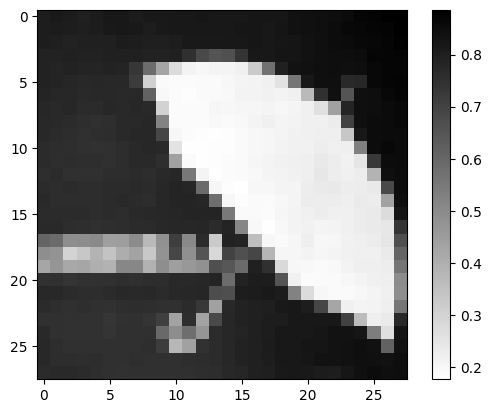

Prediction: Shirt





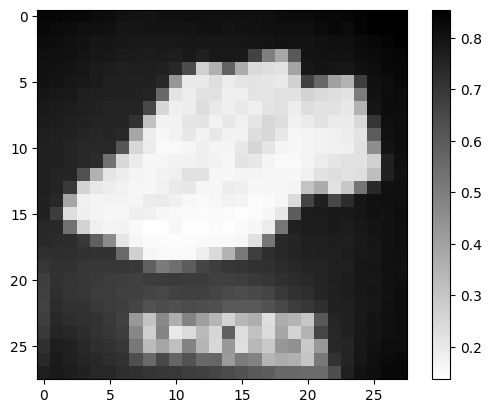

Prediction: Shirt





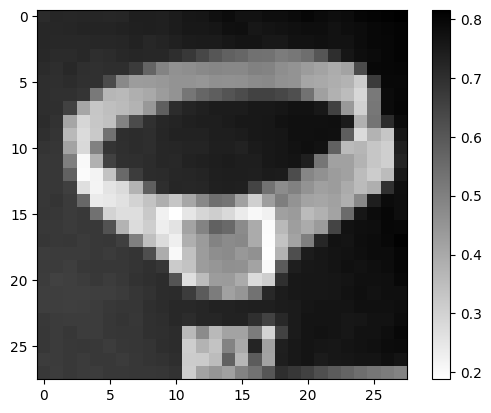

Prediction: Shirt





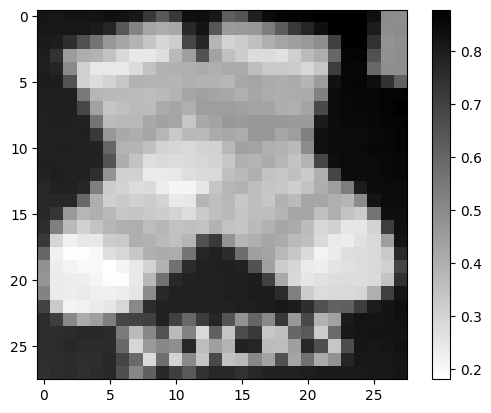

Prediction: Shirt





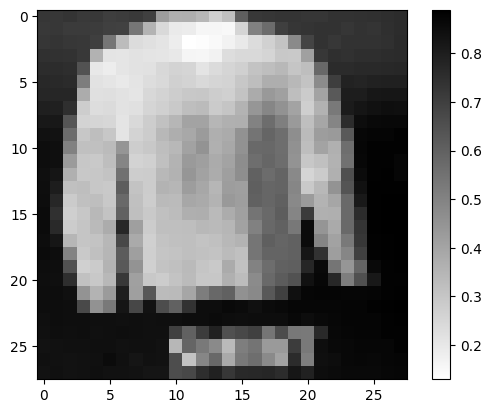

Prediction: Shirt





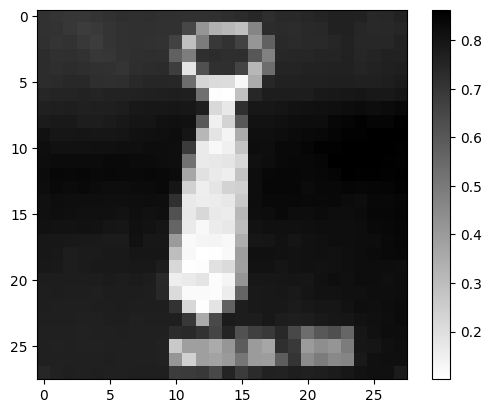

Prediction: Shirt





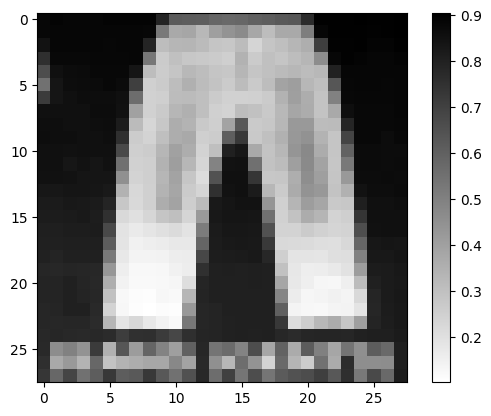

Prediction: Shirt





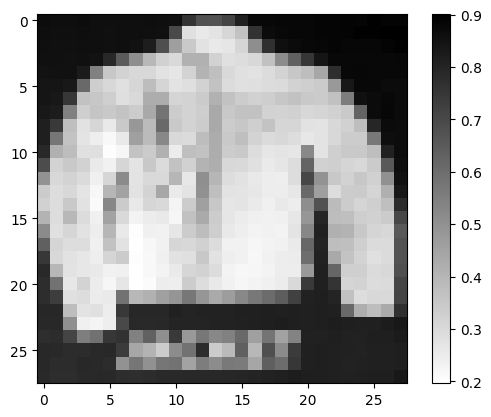

Prediction: Shirt





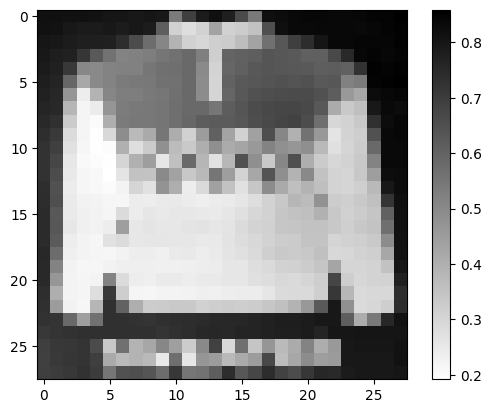

Prediction: Shirt





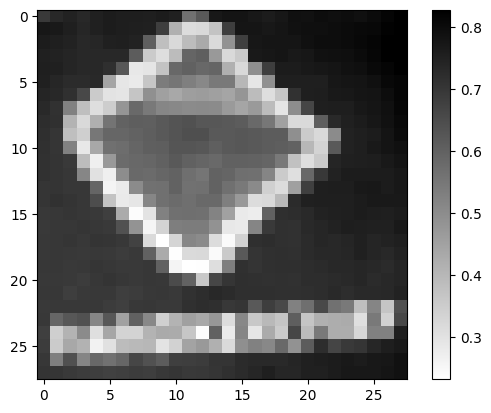

Prediction: Shirt





In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
import numpy as np
from PIL import Image

# def plot_value_array(i, predictions_array, true_label):
#   true_label = true_label[i]
#   plt.grid(False)
#   plt.xticks(range(10))
#   plt.yticks([])
#   thisplot = plt.bar(range(10), predictions_array, color="#777777")
#   plt.ylim([0, 1])
#   predicted_label = np.argmax(predictions_array)

#   thisplot[predicted_label].set_color('red')
#   thisplot[true_label].set_color('blue')

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, color_mode = "grayscale", target_size=(28, 28)) 
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img

for i in range(len(images_set)):
    img = load_image(images_set[i])

    # print img
    image = np.squeeze(img)
    plt.figure()
    plt.imshow(image, cmap='binary')
    plt.colorbar()
    plt.grid(False)
    plt.show()

    # reshape to give to model 28*28=784
    img = img.reshape(1, 784)
    result2 = knn.predict(img)
    print('Prediction:', class_names[result2[0]])
    print('\n\n')

    # result = model.predict(img)
    # plot_value_array(1, result[0], y_test)
    # _ = plt.xticks(range(10), class_names, rotation=45)
    # plt.show()

Some other models that can be used are:


SVM= The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes. SVM is a very good algorithm for doing classification. It's a supervised learning algorithm that is mainly used to classify data into different classes. SVM trains on a set of label data

CNN- Convolutional Neural Network, also known as convnets or CNN, is a well-known method in computer vision applications. It is a class of deep neural networks that are used to analyze visual imagery. This type of architecture is dominant to recognize objects from a picture or video.
